# Performance analystics on slide level
#### K-Means algorithm for slide clusting referring to their performance
#### Calculate percentage of TP, FP, TN, FN

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [65]:
# load data
df = pd.read_csv(os.path.join('E:\deeplearning\Hepatocarcinomes\SlidesClassification', 'vgg16_performance_training.csv'), delimiter=';')

In [66]:
path = 'E:\\deeplearning\\Hepatocarcinomes\\SlidesClassification\\ResultsAnalysis\\Version1\\TrainingSet'

In [67]:
# show data example
df.head()

,Slide Name,Optimal Threshold,True Positive,True Negative,False Positive,False Negative,Sensitivity (TPR),Specificity (TNR),Precision (PPV),Fall-Out (FPR),Area under ROC (AUC),Accuracy (ACC),F1-Score,Intersection over Union (IoU)
0,HMNT0001.ndpi,0.692998,7781,7801,335,929,0.893341,0.958825,0.958724,0.041175,0.975960,0.924967,0.924878,0.860254
1,HMNT0003 - 2017-05-29 15.41.33.ndpi,0.592499,6261,3872,504,1191,0.840177,0.884826,0.925499,0.115174,0.940180,0.856696,0.880777,0.786953
2,HMNT0003_bis.ndpi,0.300768,8264,6475,983,3283,0.715684,0.868195,0.893695,0.131805,0.881160,0.775533,0.794845,0.659537
3,HMNT0004 - 2017-07-08 21.07.19.ndpi,0.786007,7716,1156,229,2449,0.759075,0.834657,0.971177,0.165343,0.876073,0.768139,0.852126,0.742351
4,HMNT0023 - 2017-08-19 00.15.23.ndpi,0.740377,10554,10315,1264,1835,0.851885,0.890837,0.893045,0.109163,0.943608,0.870703,0.871979,0.773017


In [68]:
from heapq import nlargest
n=5
for i in range(n):
    print(df.loc[df['Area under ROC (AUC)']==nlargest(n, df['Area under ROC (AUC)'].values)[i]]['Slide Name'])

464    HMNT0588_bis - 2017-07-18 20.27.23.ndpi
Name: Slide Name, dtype: object
15    HMNT0055_bis - 2017-07-13 22.57.41.ndpi
Name: Slide Name, dtype: object
280    HMNT0391_bis - 2017-07-24 23.41.01.ndpi
Name: Slide Name, dtype: object
494    HMNT0649_bis - 2017-07-25 07.46.36.ndpi
Name: Slide Name, dtype: object
274    HMNT0367_bis - 2017-06-13 14.14.09.ndpi
Name: Slide Name, dtype: object


In [69]:
# calculate the average of indicators
m = {'Sensitivity (TPR)': [np.mean(df['Sensitivity (TPR)'].values)],
     'Specificity (TNR)': [np.mean(df['Specificity (TNR)'].values)],
     'Precision (PPV)': [np.mean(df['Precision (PPV)'].values)],
     'Fall-Out (FPR)': [np.mean(df['Fall-Out (FPR)'].values)],
     'Area under ROC (AUC)': [np.mean(df['Area under ROC (AUC)'].values)],
     'Accuracy (ACC)': [np.mean(df['Accuracy (ACC)'].values)],
     'F1-Score': [np.mean(df['F1-Score'].values)],
     'Intersection over Union (IoU)': [np.mean(df['Intersection over Union (IoU)'].values)]}
mean = pd.DataFrame(data=m)
mean = mean.transpose()
mean.columns = ['mean values']
mean.to_csv(os.path.join(path, 'mean_performance.csv'), index=True, header=True)

## 2D Scatter Plot

In [70]:
# to observation how many classes we should have
def plotscatter(x, y):
    plt.rc('font', family='STXihei', size=10)
    plt.scatter(df[x],df[y],50,color='blue',marker='+',linewidth=1,alpha=0.8)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
    plt.show()

In [71]:
def clustering(n, x, y, name):
    data = np.array(df[[x, y]])
    # set 3 classes
    clf=KMeans(n_clusters = n)
    # fit the model
    clf=clf.fit(data)
    
    # mean of each class
    clf.cluster_centers_
    
    idx = np.argsort(clf.cluster_centers_.sum(axis=1))
    lut = np.zeros_like(idx)
    lut[idx] = np.arange(n)
    
    # add a 'label' column to data
    df['label']=lut[clf.labels_]
    
    # draw color map of clusting
    plt.rc('font', family='STXihei', size=10)
    for i in range(n):
        plt.scatter(df.loc[df["label"]==i][x],df.loc[df["label"]==i][y],50,cmap='viridis',marker='+',linewidth=1,alpha=1)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(name.replace('_', '-'))
    plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
    
    for i in range(n):
        print(str(len(df.loc[df["label"]==i][x])) + ' ' + str(clf.cluster_centers_[idx][i]))
        plt.text(0.01, 0.06*i+0.02,str(len(df.loc[df["label"]==i][x])) + ' ' + str(clf.cluster_centers_[idx][i]))
        
    plt.savefig(os.path.join(path, name+'.png'))
    plt.show()
        
    nsample = 0
    nlabel = 0
    while(nsample<=20):
        nsample = nsample + len(df.loc[df["label"]==nlabel][x])
        nlabel = nlabel + 1

    for ii in range(nlabel):
        data = df.loc[df["label"]==ii][['Slide Name','label']]
        if not ii == 0:
            data.to_csv(os.path.join(path, name+'.csv'), index=False, header=False, mode='a')
        else:
            data.to_csv(os.path.join(path, name+'.csv'), index=False, header=True)

In [72]:
# names of columns
df.columns

Index(['Slide Name', 'Optimal Threshold', 'True Positive', 'True Negative',
       'False Positive', 'False Negative', 'Sensitivity (TPR)',
       'Specificity (TNR)', 'Precision (PPV)', 'Fall-Out (FPR)',
       'Area under ROC (AUC)', 'Accuracy (ACC)', 'F1-Score',
       'Intersection over Union (IoU)'],
      dtype='object')

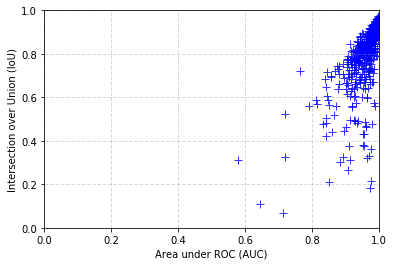

In [82]:
x_name = 'Area under ROC (AUC)'
y_name = 'Intersection over Union (IoU)'
indicators_name = 'AUC_IoU'

plotscatter(x_name, y_name)

37 [0.88673269 0.38566863]
84 [0.91736801 0.66593966]
188 [0.95349717 0.80323515]
232 [0.98319228 0.90607232]


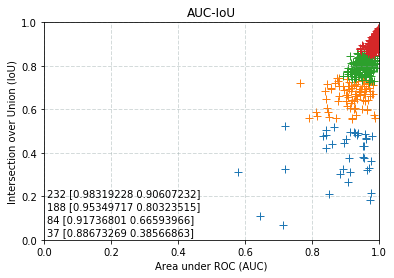

In [83]:
n_cluster = 4

clustering(n_cluster, x_name, y_name, indicators_name)

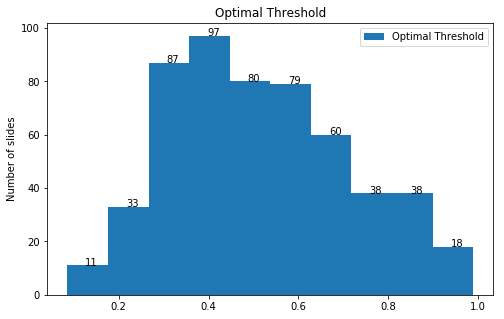

In [84]:
data = df[['Optimal Threshold']]
label = ['Optimal Threshold']

n_bins=10
fig,ax=plt.subplots(figsize=(8,5))
arr=ax.hist(data.values, n_bins, histtype='bar',label=label)
ax.set_title('Optimal Threshold')
plt.ylabel('Number of slides')
ax.legend()
for i in range(n_bins):
    plt.text(arr[1][i]+0.04,arr[0][i],str(int(arr[0][i])))
plt.savefig(os.path.join(path, 'optimal_threshold.png'))
plt.show()


In [85]:
print(df.loc[df['Optimal Threshold']<0.3]['Slide Name'])

8          HMNT0025 - 2017-08-19 02.59.35.ndpi
9      HMNT0025_bis - 2017-08-19 03.56.58.ndpi
19     HMNT0060_bis - 2017-07-09 00.29.11.ndpi
28         HMNT0067 - 2017-07-09 07.44.14.ndpi
38         HMNT0073 - 2017-06-17 21.44.27.ndpi
43         HMNT0076 - 2017-06-03 17.13.07.ndpi
44     HMNT0076_bis - 2017-06-03 18.07.09.ndpi
46     HMNT0077_bis - 2017-07-15 21.30.38.ndpi
47         HMNT0082 - 2017-08-18 21.10.31.ndpi
52         HMNT0091 - 2017-07-14 08.54.16.ndpi
55     HMNT0096_bis - 2017-05-31 01.37.29.ndpi
56         HMNT0097 - 2017-05-30 05.45.28.ndpi
63         HMNT0102 - 2017-07-14 22.14.28.ndpi
64     HMNT0102_bis - 2017-07-14 23.08.05.ndpi
69     HMNT0106_bis - 2017-06-11 10.39.38.ndpi
78         HMNT0114 - 2017-07-24 18.00.24.ndpi
79     HMNT0114_bis - 2017-07-24 18.31.17.ndpi
80         HMNT0115 - 2017-05-29 19.34.51.ndpi
87         HMNT0119 - 2017-07-09 10.29.17.ndpi
89     HMNT0120_bis - 2017-07-09 12.04.56.ndpi
90         HMNT0121 - 2017-06-03 06.27.19.ndpi
91     HMNT01

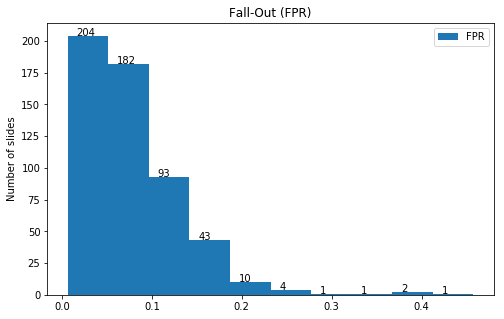

In [86]:
data = df[['Fall-Out (FPR)']]
label = ['FPR']

n_bins=10
fig,ax=plt.subplots(figsize=(8,5))
arr=ax.hist(data.values, n_bins, histtype='bar',label=label)
ax.set_title('Fall-Out (FPR)')
plt.ylabel('Number of slides')
# plt.xlim(0,1)
ax.legend()
for i in range(n_bins):
    plt.text(arr[1][i]+0.01,arr[0][i],str(int(arr[0][i])))
plt.savefig(os.path.join(path, 'fpr.png'))
plt.show()

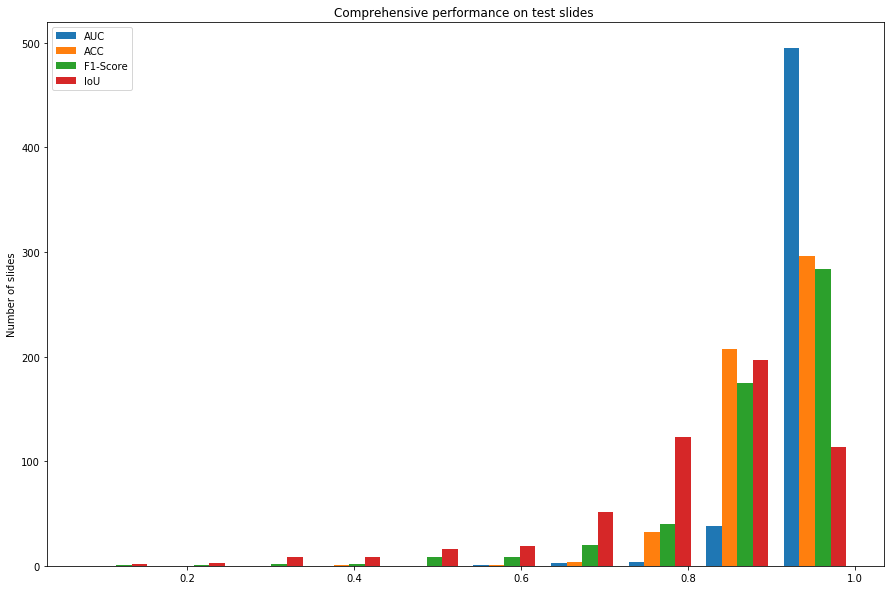

In [87]:
data = df[['Area under ROC (AUC)', 'Accuracy (ACC)', 'F1-Score',
       'Intersection over Union (IoU)']]
label = ['AUC', 'ACC', 'F1-Score','IoU']

n_bins=10
fig,ax=plt.subplots(figsize=(15,10))
ax.hist(data.values, n_bins, histtype='bar',label=label)
ax.set_title('Comprehensive performance on test slides ')
plt.ylabel('Number of slides')
ax.legend()
plt.savefig(os.path.join(path, 'comprehensive_performance.png'))
plt.show()

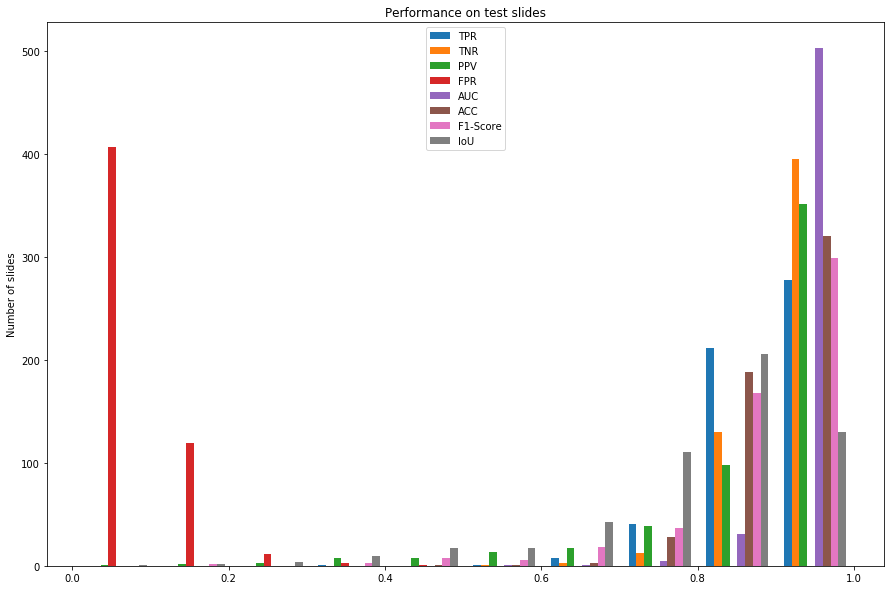

In [88]:
data = df[['Sensitivity (TPR)',
       'Specificity (TNR)', 'Precision (PPV)','Fall-Out (FPR)',
       'Area under ROC (AUC)', 'Accuracy (ACC)', 'F1-Score',
       'Intersection over Union (IoU)']]
label = ['TPR', 'TNR', 'PPV', 'FPR', 'AUC', 'ACC', 'F1-Score','IoU']

n_bins=10
fig,ax=plt.subplots(figsize=(15,10))
ax.hist(data.values, n_bins, histtype='bar',label=label)
ax.set_title('Performance on test slides')
plt.ylabel('Number of slides')
ax.legend()
plt.savefig(os.path.join(path, 'full_performance.png'))
plt.show()

## To find which class damages the performance:
### Step 1: Confusion matrix. 
#### [[TP, FN], [FP, TN]] should be [[black, white], [black, white]]. If there are gray items, the problem is caused by an item in the column.
### Step 2: Percentage of items. 
#### [TP, FP, TN, FN] should be [lower, lower, higher, higher] refering to 0.25. Look at the items in the column mentioned, the one matched is the wanted class. 
#### For example, [0.4,  ,  , 0.3], FN!

In [ ]:
# calculate the percentage of TP, FP, TN, FN
name = 'HMNT1550_bis - 2017-06-18 05.49.26.ndpi'

tp = df['True Positive'][df["Slide Name"] == name]
fp = df['False Positive'][df["Slide Name"] == name]
tn = df['True Negative'][df["Slide Name"] == name]
fn = df['False Negative'][df["Slide Name"] == name]

sum = tp + fp + tn + fn

print('TP: ' + str(tp/sum))
print('FP: ' + str(fp/sum))
print('TN: ' + str(tn/sum))
print('FN: ' + str(fn/sum))